In [1]:
import numpy as np

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from matplotlib import ticker
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import matplotlib.colors

import pylab as plt
from pylab import rcParams
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.family'] = 'serif'

PASTEL_COLORS = ['#A4A6BA', '#D9AE9E', '#628793']

/var/folders/fy/h20z78md68jgtxrgcl3h1y4r0000gn/T/ipykernel_13844/3787935751.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
def wavelength_to_rgb(wavelength, gamma=0.8):
    ''' taken from http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
    This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    Additionally alpha value set to 0.5 outside range
    '''
    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 750:
        A = 1.
    else:
        A=0.5
    if wavelength < 380:
        wavelength = 380.
    if wavelength >750:
        wavelength = 750.
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    return (R,G,B,A)

clim=(350,780)
norm = plt.Normalize(*clim)
wl = np.arange(clim[0],clim[1]+1,2)
colorlist = list(zip(norm(wl),[wavelength_to_rgb(w) for w in wl]))
spectralmap = matplotlib.colors.LinearSegmentedColormap.from_list("spectrum", colorlist)

wavelengths = np.linspace(200, 1000, 1000)
y = np.linspace(0, 6, 100)
X,Y = np.meshgrid(wavelengths, y)

## HIERARCHICAL INTERPOLATION PLOT

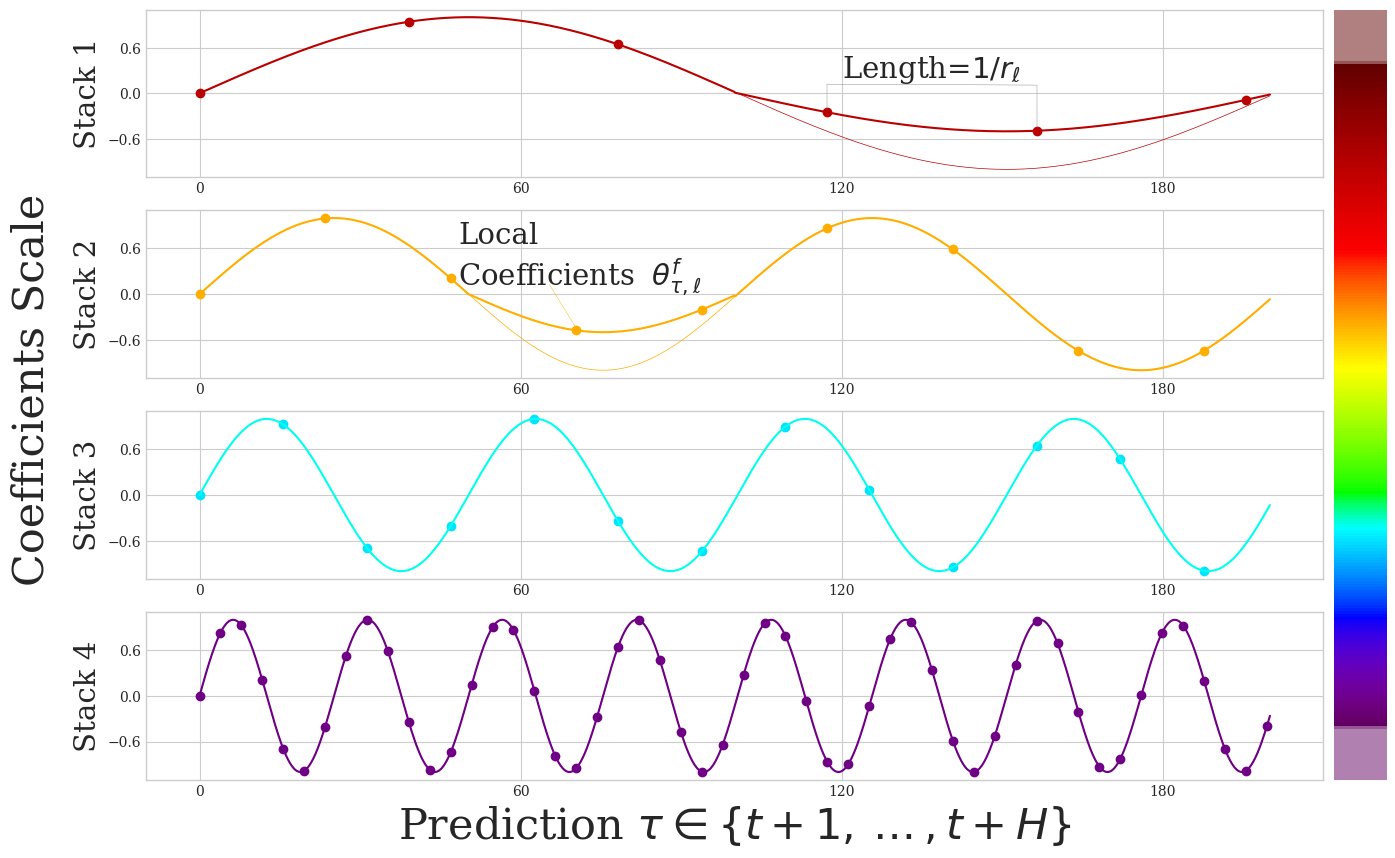

In [3]:
def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.tick_params(labelbottom=False, labelleft=False)
        
yticks = ticker.MaxNLocator(4)
xticks = ticker.MaxNLocator(4)

fig = plt.figure(figsize=(16,10)) #constrained_layout=True, 

# Define Plot Layout
gs = GridSpec(4, 20, figure=fig)
ax1 = fig.add_subplot(gs[0, :-1])
ax2 = fig.add_subplot(gs[1, :-1])
ax3 = fig.add_subplot(gs[2, :-1])
ax4 = fig.add_subplot(gs[3, :-1])
ax5 = fig.add_subplot(gs[:, -1])

# Plot Contents
horizon = 200

# harmonics
x  = np.linspace(start=0, stop=horizon, num=1024)
z1 = np.sin(x/32)
z2 = np.sin(x/16)
z3 = np.sin(x/8)
z4 = np.sin(x/4)

# N-hits coefficients
nx     = len(x)
ones   = np.ones(nx)
coeff1 = ones.copy()
coeff2 = ones.copy()
coeff3 = ones.copy()
coeff4 = ones.copy()

coeff1[nx//2:] = 0.5 * coeff1[nx//2:]
coeff2[nx//4:nx//2] = 0.5 * coeff2[nx//4:nx//2]

# N-hits signal
y1 = coeff1 * z1
y2 = coeff2 * z2
y3 = coeff3 * z3
y4 = coeff4 * z4

# N-hits sampled points
p1 = np.empty((nx,)) * np.nan
p2 = np.empty((nx,)) * np.nan
p3 = np.empty((nx,)) * np.nan
p4 = np.empty((nx,)) * np.nan

# sampling rates
idx1 = np.arange(0,1024,200)
idx2 = np.arange(0,1024,120)
idx3 = np.arange(0,1024,80)
idx4 = np.arange(0,1024,20)

p1[idx1] = y1[idx1]
p2[idx2] = y2[idx2]
p3[idx3] = y3[idx3]
p4[idx4] = y4[idx4]

# Inverted spectralmap vs decresing wavelength.
ax1.scatter(x, p1, color=spectralmap(0.8))                #0.8
ax1.plot(x, z1, color=spectralmap(0.8), linewidth=0.5)  
ax1.plot(x, y1, color=spectralmap(0.8), linewidth=1.5)
ax1.set_ylabel('Stack 1', fontsize=21)
ax1.yaxis.set_major_locator(yticks)
ax1.xaxis.set_major_locator(xticks)

ax2.scatter(x, p2, color=spectralmap(0.59))               #0.59
ax2.plot(x, z2, color=spectralmap(0.59), linewidth=0.5) 
ax2.plot(x, y2, color=spectralmap(0.59), linewidth=1.5)
ax2.set_ylabel('Stack 2', fontsize=21)
ax2.yaxis.set_major_locator(yticks)
ax2.xaxis.set_major_locator(xticks)

ax3.scatter(x, p3, color=spectralmap(0.31))               #0.33
ax3.plot(x, z3, color=spectralmap(0.33), linewidth=0.5) 
ax3.plot(x, y3, color=spectralmap(0.33), linewidth=1.5)
ax3.set_ylabel('Stack 3', fontsize=21)
ax3.yaxis.set_major_locator(yticks)
ax3.xaxis.set_major_locator(xticks)

ax4.scatter(x, p4, color=spectralmap(0.1))                #0.1
ax4.plot(x, z4, color=spectralmap(0.1), linewidth=0.5)  
ax4.plot(x, y4, color=spectralmap(0.1), linewidth=1.5)
ax4.set_ylabel('Stack 4', fontsize=21)
ax4.yaxis.set_major_locator(yticks)
ax4.xaxis.set_major_locator(xticks)

ax4.set_xlabel(r'Prediction $\tau \in \{t+1,\dots,t+H\}$', fontsize=31)
fig.text(0.04, 0.5, r'Coefficients Scale', va='center', rotation='vertical', fontsize=31)

fig.text(0.56, 0.82, r'Length=$1/r_{\ell}$', va='center', fontsize=21)
x1, y1 = [x[~np.isnan(p1)][3], x[~np.isnan(p1)][3]], [p1[~np.isnan(p1)][3]+0.37, p1[~np.isnan(p1)][3]+0.03]
x2, y2 = [x[~np.isnan(p1)][4], x[~np.isnan(p1)][4]], [p1[~np.isnan(p1)][4]+0.6, p1[~np.isnan(p1)][4]+0.03]
x3, y3 = [x1[0],x2[0]], [y1[0],y2[0]]

ax1.plot(x1, y1, color='gray', linewidth=0.3) #spectralmap(0.8)
ax1.plot(x2, y2, color='gray', linewidth=0.3) #spectralmap(0.8)
ax1.plot(x3, y3, color='gray', linewidth=0.3) #spectralmap(0.8)

fig.text(0.32, 0.63, 'Local\n'+r'Coefficients $\;\theta^{f}_{\tau,\ell}$', va='center', fontsize=21)
x4, y4 = [x[~np.isnan(p2)][3]-5, x[~np.isnan(p2)][3]], [p2[~np.isnan(p2)][3]+0.6, p2[~np.isnan(p2)][3]+0.03]
ax2.plot(x4, y4, color=spectralmap(0.59), linewidth=0.3)

ax5.imshow(np.flip(X.T,0), cmap=spectralmap, aspect='auto')
ax5.grid(False)
ax5.axis('off')

plt.savefig('nhits_intuition.pdf', dpi=200, pad_inches=0.0)
plt.show()
plt.close()

## HIERARCHICAL ORDER PLOTS

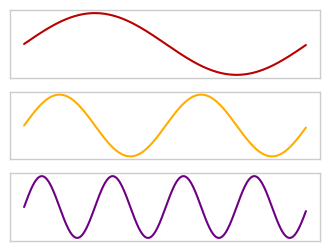

In [4]:
COLORS = [spectralmap(0.8), spectralmap(0.59), spectralmap(0.1)]

fig, axs = plt.subplots(3, figsize=(4,3))

axs[0].plot(x, z1, color=COLORS[0])
axs[0].set_xticks([])
axs[0].set_yticks([])

axs[1].plot(x, z2, color=COLORS[1])
axs[1].set_xticks([])
axs[1].set_yticks([])

axs[2].plot(x, z3, color=COLORS[2])
axs[2].set_xticks([])
axs[2].set_yticks([])

# plt.savefig('nhits_descending.pdf', bbox_inches='tight')
plt.show()

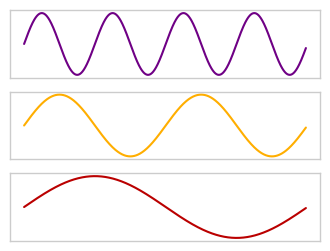

In [5]:
fig, axs = plt.subplots(3, figsize=(4,3))

axs[0].plot(x, z3, color=COLORS[2])
axs[0].set_xticks([])
axs[0].set_yticks([])

axs[1].plot(x, z2, color=COLORS[1])
axs[1].set_xticks([])
axs[1].set_yticks([])

axs[2].plot(x, z1, color=COLORS[0])
axs[2].set_xticks([])
axs[2].set_yticks([])

# plt.savefig('nhits_ascending.pdf', bbox_inches='tight')
plt.show()

In [6]:
COLORS

[(0.7287592694043689, 0.0, 0.0, 1.0),
 (1.0, 0.6831557912319673, 0.0, 1.0),
 (0.4339935529273687, 0.0, 0.5202323199870481, 1.0)]